In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from implementations import *
from crossvalidation import *
from preprocessing import *
from plots import *
from crossvalidation_ridge import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

IMPORTING TRAINING DATA

In [10]:
filename = 'train.csv'
data_folder = './data/'
file_path = data_folder + filename
y,tx,ids,features = load_train_data(file_path)

DEALING WITH CATEGORICAL VARIABLES

In [11]:
tx_train = categorical_values(tx,22,4)

IDENTIFYING AND DELETING THE COLUMNS HAVING MISSING VALUES

In [12]:
tx_train=managing_missing_values(tx_train)

HANDLING OUTLIERS

In [13]:
tx_train=capping_outliers(tx_train)

STANDARDIZING FEATURE MATRIX

In [14]:
tx_train,mean,std = standardize(tx_train)

In [15]:
#add offset
y, tx_train = build_model_data(y, tx_train)

CROSS VALIDATION FOR HYPERPARAMETERS

The choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of 0.411


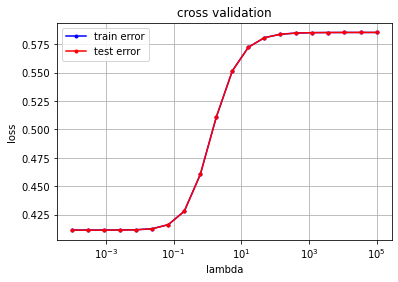

In [16]:
best_lambda,best_error = cross_validation_demo_r(y, tx_train, 4, np.logspace(-4,5,20))

TEST MODEL ACCURACY

In [17]:
test_accuracy = np.zeros(10)
train_accuracy = np.zeros(10)
for n in range(10):
    x_train,x_test,y_train,y_test = divide_dataset(tx_train,y,0.7)
    w_opt,_ = ridge_regression(y_train,x_train,best_lambda)
    pred_train = x_train.dot(w_opt)
    pred_train[pred_train>=0.5]=1
    pred_train[pred_train<0.5]=0
    pred_test = x_test.dot(w_opt)
    pred_test[pred_test>=0.5]=1
    pred_test[pred_test<0.5]=0
    train_accuracy[n] = np.sum(pred_train == y_train)/len(y_train)
    test_accuracy[n] = np.sum(pred_test == y_test)/len(y_test)

print('Average train accuracy: {}'.format(np.mean(train_accuracy)))
print('Average test accuracy: {}'.format(np.mean(test_accuracy)))
    
    
    
    

Average train accuracy: 0.7462508571428571
Average test accuracy: 0.7459053333333333


TRAINING THE MODEL

In [14]:
lambda_=0.001
w, loss = ridge_regression(y, tx_train, lambda_)

LOADING TEST DATA AND HANDLING CATEGORICAL FEATURES

In [13]:
tx_test = categorical_values(tx_test,22,4)

In [14]:
tx_test=managing_missing_values(tx_test)

STANDARDIZING DATA

In [15]:
temp_test = tx_test[:,:-4]
temp_test-= mean
temp_test/=std
tx_test[:,:-4]=temp_test

In [16]:
#add offset
y_test, tx_test = build_model_data(y_test, tx_test)

In [17]:
prob = tx_test.dot(w)
prediction = np.zeros(len(prob))
prediction[prob>=0.5]=1
prediction[prob<0.5]=-1

In [18]:
calcolo_accuracy(prediction, y_test)

0.8767066666666666